In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/MyDrive


In [ ]:
cd '/content/MyDrive/My Drive/AI/datasets'

/content/MyDrive/My Drive/AI/datasets


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D
from keras.callbacks import ModelCheckpoint, CSVLogger,LearningRateScheduler
from keras.models import Sequential,load_model
from keras.utils.vis_utils import plot_model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import os
import tensorflow as tf
%matplotlib inline

In [ ]:
def test_data():
  if os.path.exists('./test'):
    print('Test data already present')
    return
  #tf.io.gfile.mkdir('./test')
  np.random.seed(0)
  lis = glob.glob('./train/*')
  data = []
  for e in lis:
    tf.io.gfile.makedirs(e.replace('train','test'))
    pics = glob.glob(os.path.join(e,'*.jpg'))
    a,b=np.random.choice(pics,2,replace=False)
    tf.io.gfile.copy(a,a.replace('train','test'))
    tf.io.gfile.copy(b,b.replace('train','test'))
    tf.io.gfile.remove(a)
    tf.io.gfile.remove(b)
  print('Test data Completed')
  #tf.io.gfile.makedirs(lis)
test_data()

Test data already present


In [ ]:
datagen = ImageDataGenerator(rescale=1/255.0,validation_split=0.2)
train_datagen = datagen.flow_from_directory('./train',batch_size=32,target_size=(256,256),class_mode='categorical',subset='training')
valid_datagen = datagen.flow_from_directory('./train',batch_size=32,target_size=(256,256),class_mode='categorical',subset='validation')
test_datagen  = datagen.flow_from_directory('./test',batch_size=32,target_size=(256,256),class_mode='categorical')

Found 228 images belonging to 20 classes.
Found 40 images belonging to 20 classes.
Found 94 images belonging to 47 classes.


In [ ]:
def scheduler(epoch,lr):
  if epoch<30:
    return lr
  elif 30<= epoch < 60:
    return lr*0.1
  elif 60<= epoch < 90:
    return lr*0.05
  else: return lr*0.01

In [ ]:
def model(image_size = (None,None,3),dropout=0.4):
  model = Sequential()
  model.add(Conv2D(filters=4,kernel_size=(3,3),padding='same',activation='relu', input_shape=image_size))
  model.add(MaxPooling2D(padding='valid',pool_size=(2,2)))
  model.add(Dropout(dropout))
  model.add(Conv2D(filters=8,kernel_size=(3,3),padding='same',activation='relu'))
  model.add(MaxPooling2D(padding='valid',pool_size=(2,2)))
  model.add(Dropout(dropout))
  model.add(Conv2D(filters=12,kernel_size=(3,3),padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))
  model.add(Dropout(dropout))
  model.add(Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))
  model.add(Dropout(dropout))
  model.add(Conv2D(filters=24,kernel_size=(3,3),padding='same',activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))
  model.add(Dropout(dropout))
  model.add(Flatten()) 
  model.add(Dense(1024,activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(256,activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(100,activation='sigmoid'))
  model.summary()
  model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
model = model(image_size=(256,256,3))

TypeError: ignored

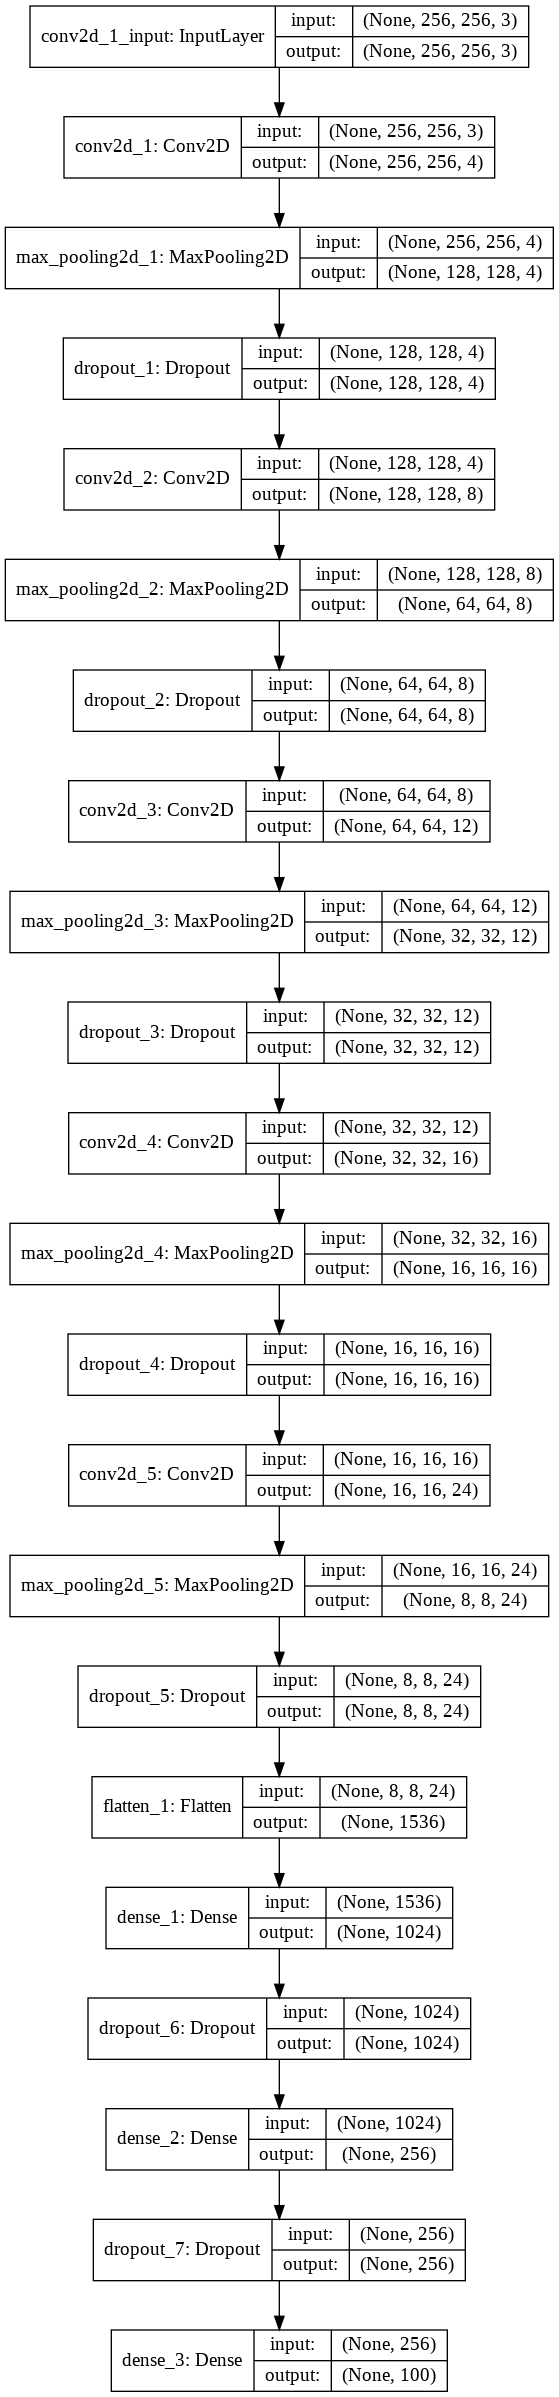

In [ ]:
plot_model(model,to_file='./results/model.png',rankdir='TB',show_shapes=True)

In [ ]:
lis = glob.glob(os.path.join('./results','*.hdf5'))
ind =0
for m in lis:
  temp=m.split('_')
  ind =max(ind,int(temp[1]))
if not os.path.exists('./results'):
  tf.io.gfile.mkdir('./results')
#lr_scheduler = LearningRateScheduler(schedule=scheduler)
check_pointer = ModelCheckpoint('./results/_%d_model-best.hdf5'%(ind+1),save_best_only=True)
csv_logger = CSVLogger('./results/training_{}.csv'.format(ind+1),separator=',',append=False)
history=model.fit_generator(train_datagen,validation_data=valid_datagen, epochs=50,callbacks=[check_pointer,csv_logger])

Epoch 1/50
38/38 [==============================] - 788s 21s/step - loss: 4.7900 - accuracy: 0.0092 - val_loss: 4.6069 - val_accuracy: 0.0100
Epoch 2/50
38/38 [==============================] - 5s 126ms/step - loss: 4.6091 - accuracy: 0.0108 - val_loss: 4.6051 - val_accuracy: 0.0100
Epoch 3/50
38/38 [==============================] - 5s 134ms/step - loss: 4.6006 - accuracy: 0.0133 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 4/50
38/38 [==============================] - 5s 134ms/step - loss: 4.5362 - accuracy: 0.0183 - val_loss: 4.5821 - val_accuracy: 0.0550
Epoch 5/50
38/38 [==============================] - 5s 132ms/step - loss: 4.2295 - accuracy: 0.0542 - val_loss: 4.5584 - val_accuracy: 0.1100
Epoch 6/50
38/38 [==============================] - 5s 135ms/step - loss: 3.8292 - accuracy: 0.1008 - val_loss: 4.4273 - val_accuracy: 0.1800
Epoch 7/50
38/38 [==============================] - 5s 130ms/step - loss: 3.4999 - accuracy: 0.1583 - val_loss: 4.2584 - val_accuracy: 0.2250
Epoch 

In [ ]:
glob.glob(os.path.join('./results','*.hdf5'))

['./results/_1_model_0.75506.hdf5',
 './results/_3_model_0.73045.hdf5',
 './results/_4_model_0.75995.hdf5',
 './results/_11_model-best.hdf5',
 './results/_11_model_0.78387.hdf5',
 './results/_14_model-best.hdf5',
 './results/_14_model_0.79015.hdf5',
 './results/_17_model-best.hdf5',
 './results/_17_model_0.76065.hdf5',
 './results/_19_model-best.hdf5',
 './results/_19_model_0.80045.hdf5',
 './results/_20_model-best.hdf5',
 './results/_20_model_0.83485.hdf5',
 './results/_21_model-best.hdf5',
 './results/_21_model_0.78404.hdf5',
 './results/_22_model-best.hdf5',
 './results/_23_model-best.hdf5',
 './results/_24_model-best.hdf5',
 './results/_25_model-best.hdf5',
 './results/_26_model-best.hdf5',
 './results/_27_model-best.hdf5',
 './results/_27_model_0.77497.hdf5',
 './results/_28_model-best.hdf5',
 './results/_28_model_0.60492.hdf5',
 './results/_29_model-best.hdf5',
 './results/_29_model_0.76484.hdf5']

In [ ]:
scores = model.evaluate_generator(test_datagen,200,workers=0) 
print("Accuracy = ", scores[1])

model.save('./results/_{}_model_{:.5f}.hdf5'.format(ind+1,scores[1]))

Accuracy =  0.6396648287773132


In [ ]:
def report(y_pred):
  y_pred = np.argmax(y_pred,axis=1)
  lis = glob.glob('./test/*')
  targets = [ele.split('/')[-1] for ele in lis]
  targets.sort()
  targets
  print(classification_report(test_datagen.classes[test_datagen.index_array],y_pred,target_names=targets))
  
def confusion(y_pred):
  y_pred = np.argmax(y_pred,axis=1)
  cm = confusion_matrix(test_datagen.classes[test_datagen.index_array],y_pred)
  df =pd.DataFrame(cm,columns=[i for i in range(100)],index=[i for i in range(100)])
  fig,ax = plt.subplots(figsize=(50,50),tight_layout=True)
  sns.heatmap(df,annot=True,cmap=plt.cm.viridis)
  ax.set_title('Confusion matrix representation in heat map\n accuracy_score = {}'.format(accuracy_score(test_datagen.classes[test_datagen.index_array],y_pred)),fontdict={'fontsize':30,'fontweight':'bold'})
  ax.set_xlabel('Leaf_classes',fontdict={'fontsize':30})
  ax.xaxis.tick_top()
  ax.set_ylabel('Leaf_classes',fontdict={'fontsize':30})
  fig.savefig('./results/fig.png')
  plt.show()


In [ ]:
test_datagen.reset()
scores_ = model.predict_generator(test_datagen,workers=0)
report(scores_)

                              precision    recall  f1-score   support

              Acer_Campestre       0.33      0.50      0.40         2
             Acer_Capillipes       0.67      1.00      0.80         2
             Acer_Circinatum       1.00      0.50      0.67         2
                   Acer_Mono       1.00      1.00      1.00         2
                 Acer_Opalus       0.00      0.00      0.00         2
               Acer_Palmatum       1.00      1.00      1.00         2
                 Acer_Pictum       1.00      1.00      1.00         2
             Acer_Platanoids       0.50      0.50      0.50         2
                 Acer_Rubrum       0.00      0.00      0.00         2
              Acer_Rufinerve       1.00      1.00      1.00         2
            Acer_Saccharinum       1.00      0.50      0.67         2
               Alnus_Cordata       0.50      0.50      0.50         2
          Alnus_Maximowiczii       0.50      1.00      0.67         2
                 Al

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


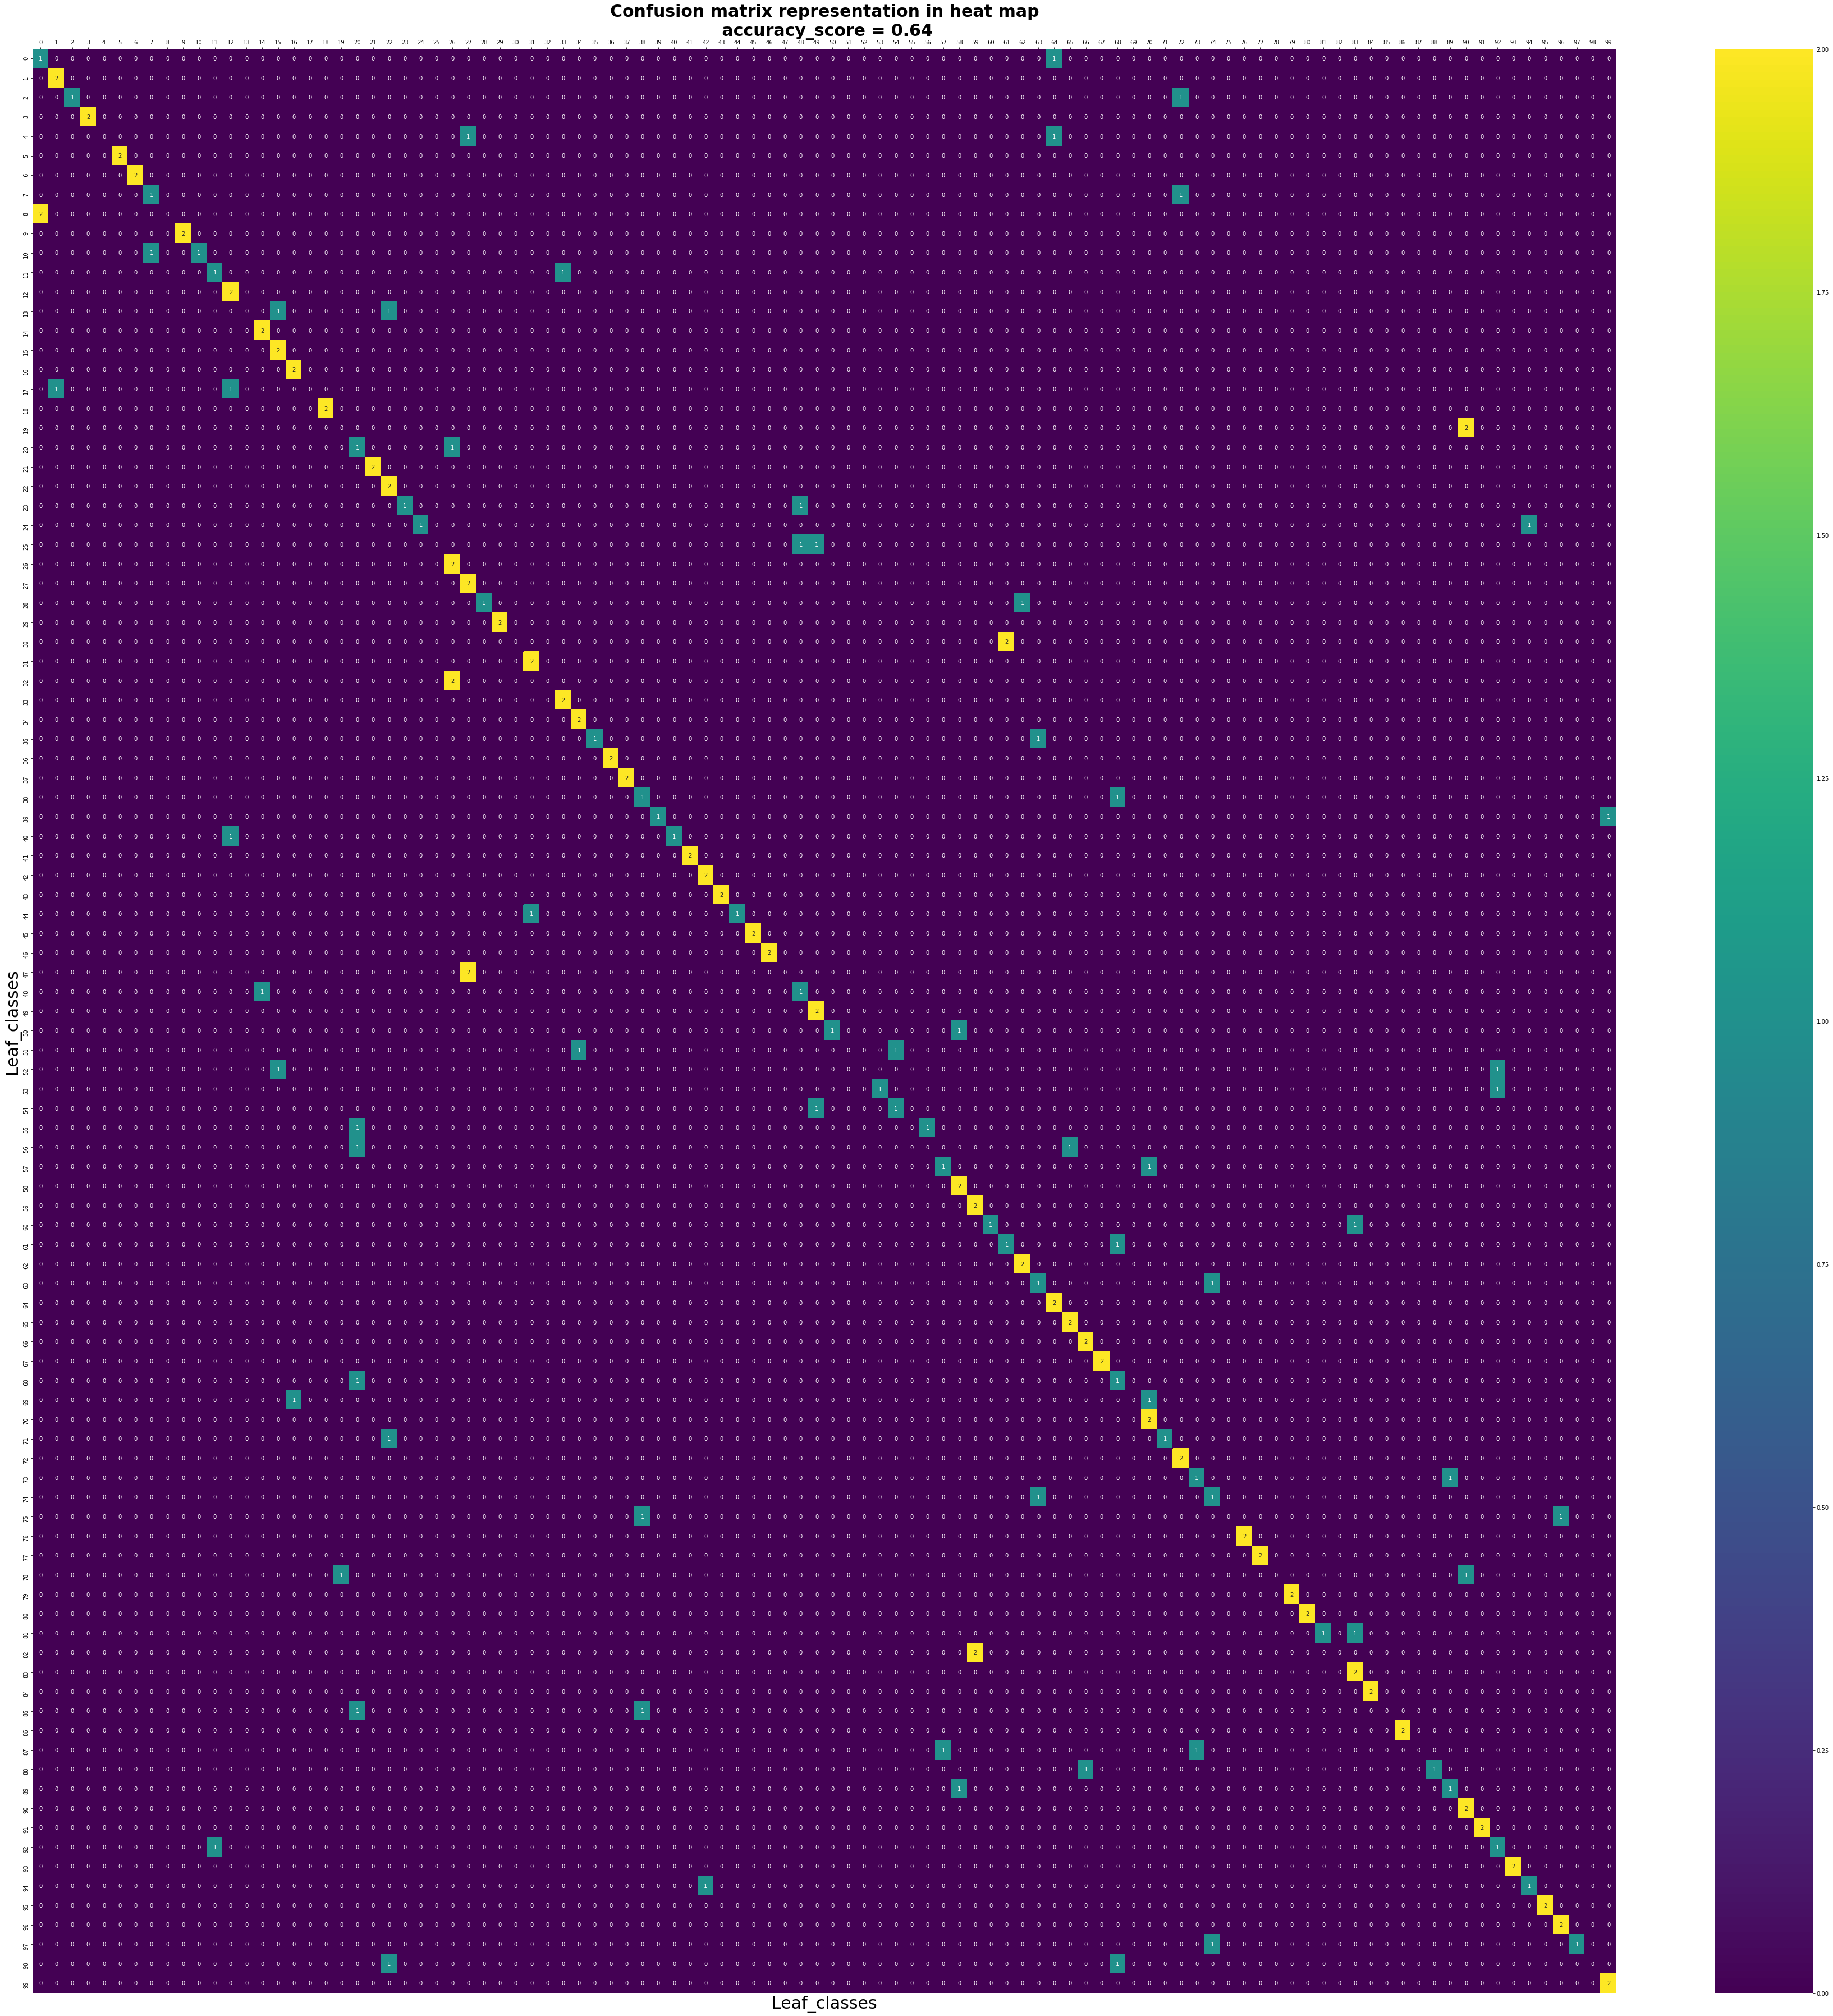

In [ ]:
confusion(scores_)

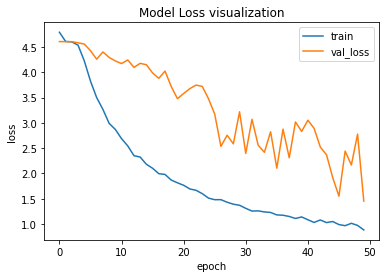

In [ ]:
def loss_plot():
  log = pd.read_csv('./results/training_{}.csv'.format(ind+1),sep=',')
  plt.figure()
  plt.plot(log['loss'])
  plt.plot(log['val_loss'])
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.title('Model Loss visualization')
  plt.legend(['train','val_loss'])
  plt.show()
loss_plot()

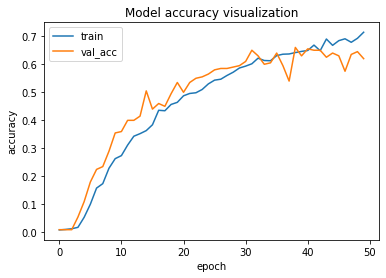

In [ ]:
def acc_plot():
  log = pd.read_csv('./results/training_{}.csv'.format(ind+1),sep=',')
  plt.figure()
  plt.plot(log['accuracy'])
  plt.plot(log['val_accuracy'])
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.title('Model accuracy visualization')
  plt.legend(['train','val_acc'])
  plt.show()
acc_plot()

Best_Accuracy =  0.8496857285499573


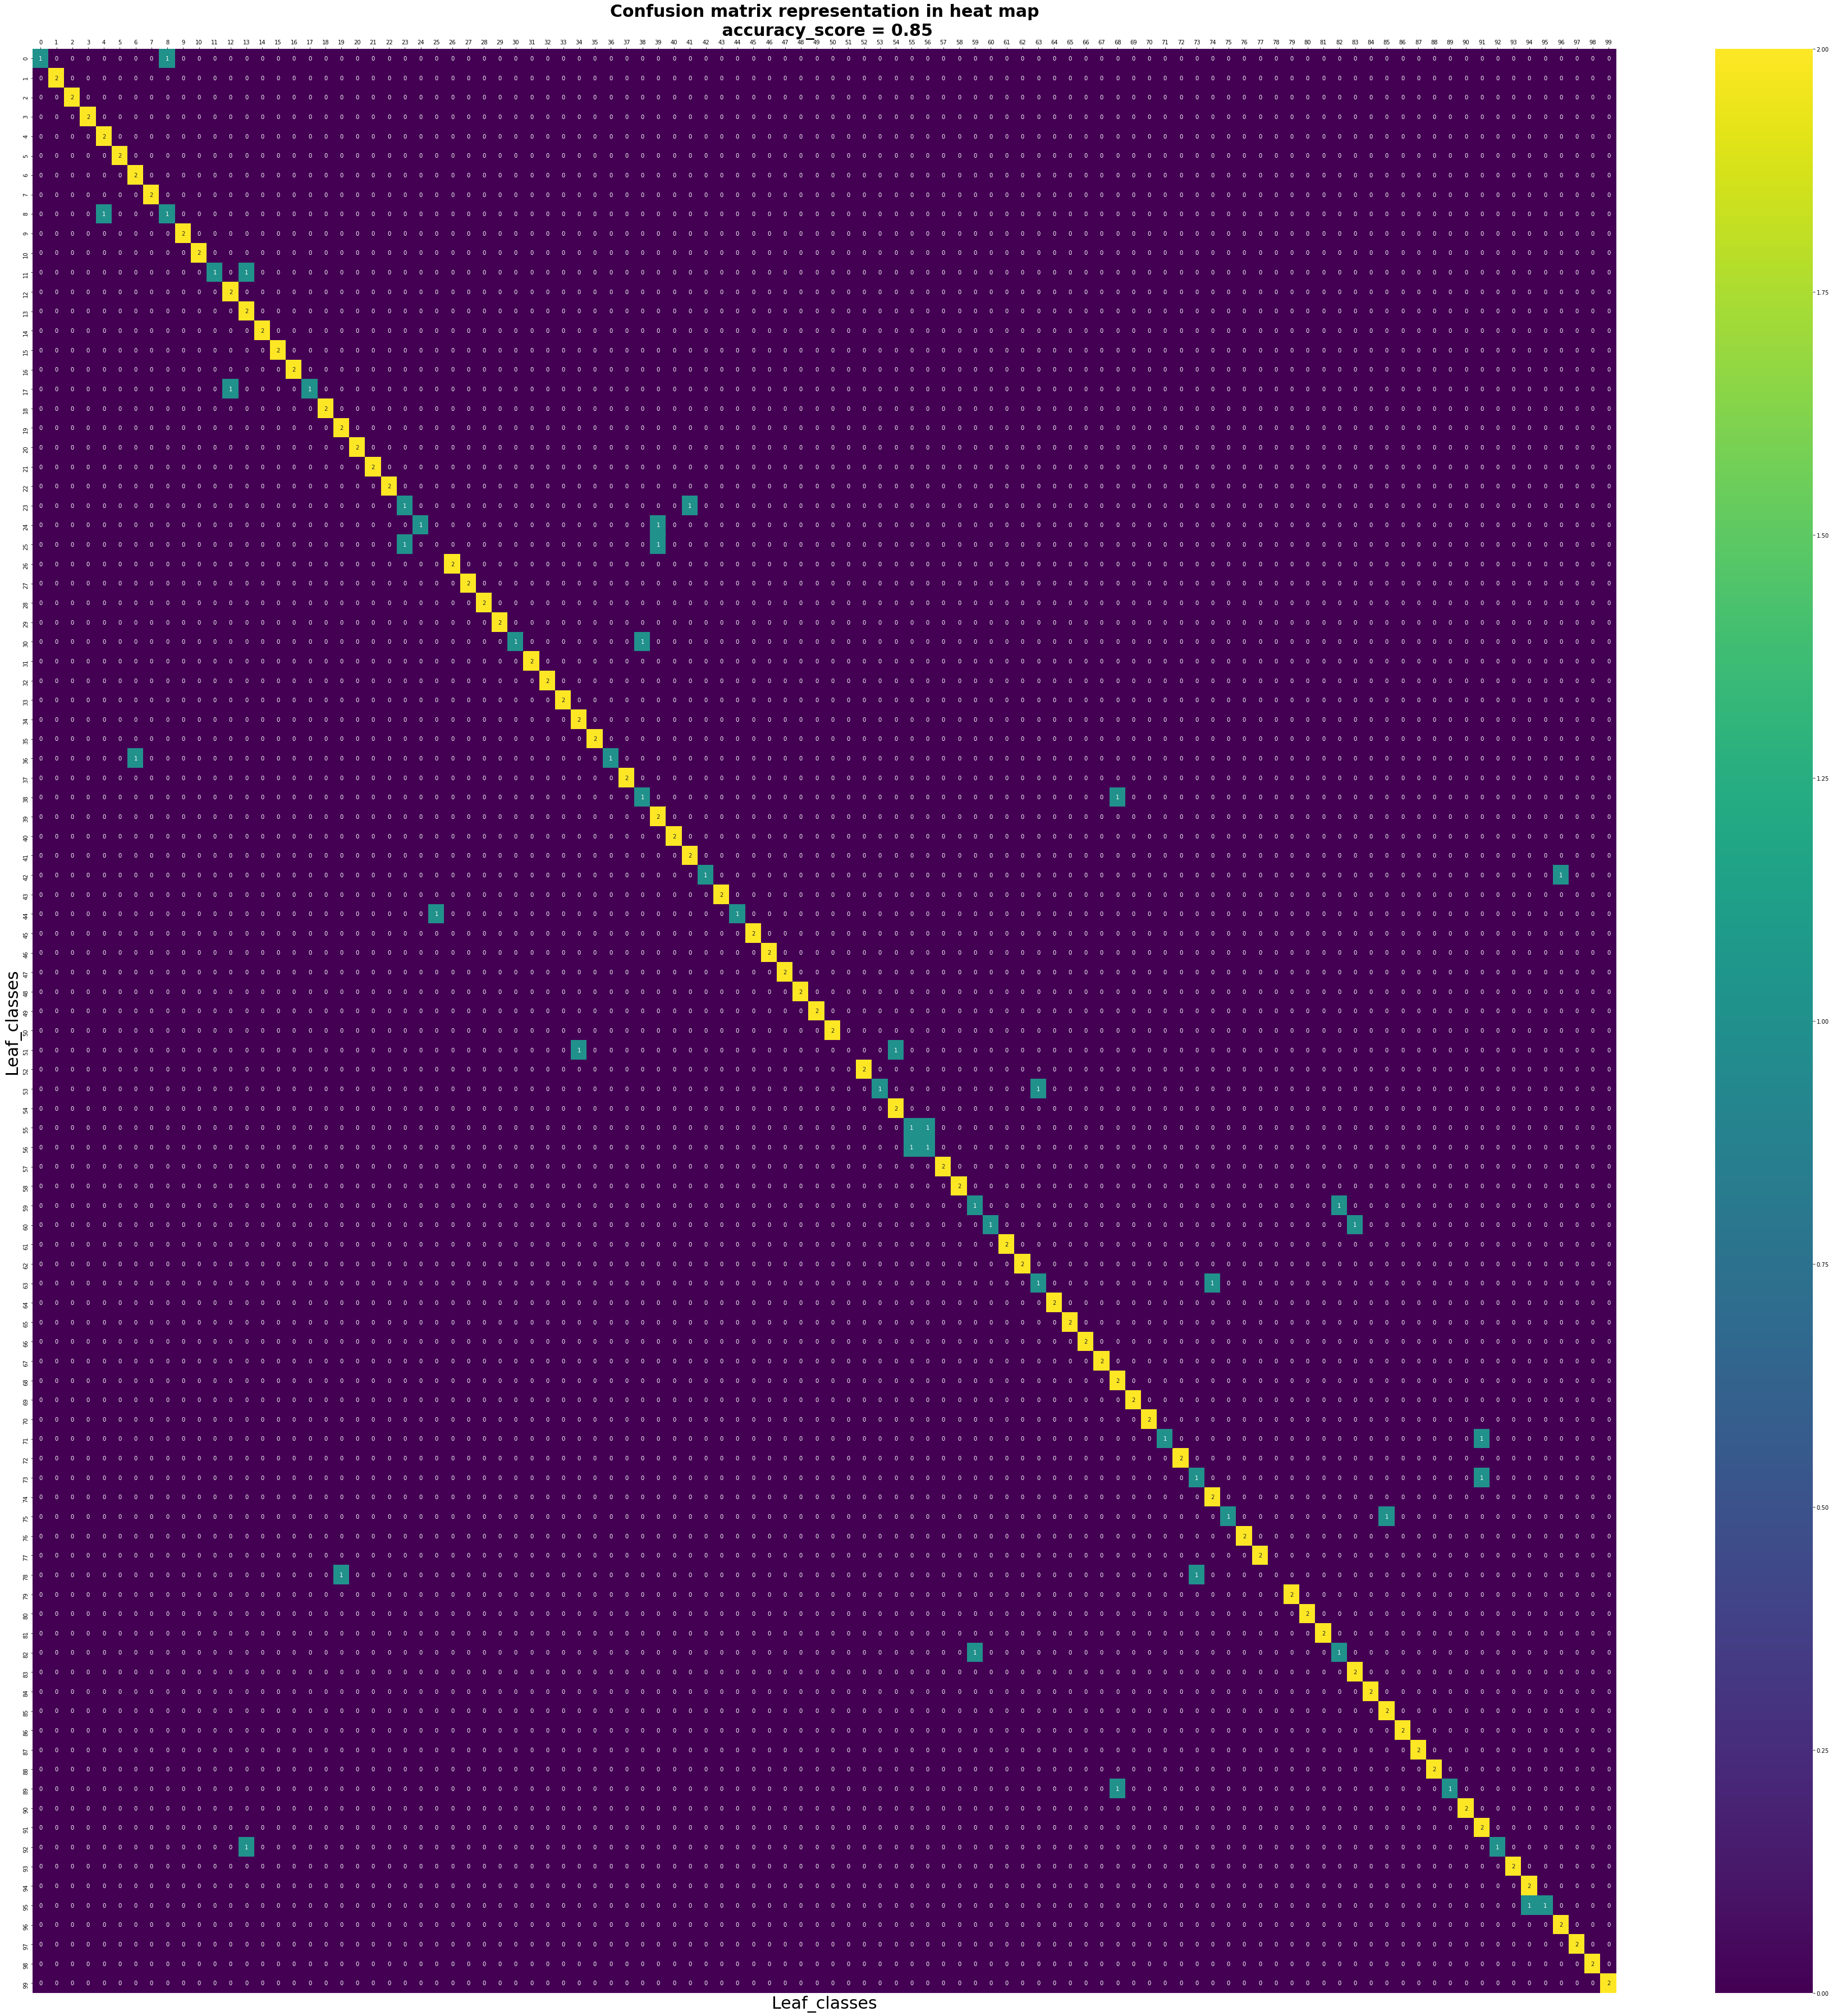

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                              precision    recall  f1-score   support

              Acer_Campestre       1.00      0.50      0.67         2
             Acer_Capillipes       1.00      1.00      1.00         2
             Acer_Circinatum       1.00      1.00      1.00         2
                   Acer_Mono       1.00      1.00      1.00         2
                 Acer_Opalus       0.67      1.00      0.80         2
               Acer_Palmatum       1.00      1.00      1.00         2
                 Acer_Pictum       0.67      1.00      0.80         2
             Acer_Platanoids       1.00      1.00      1.00         2
                 Acer_Rubrum       0.50      0.50      0.50         2
              Acer_Rufinerve       1.00      1.00      1.00         2
            Acer_Saccharinum       1.00      1.00      1.00         2
               Alnus_Cordata       1.00      0.50      0.67         2
          Alnus_Maximowiczii       0.67      1.00      0.80         2
                 Al

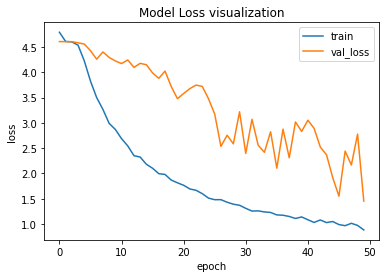

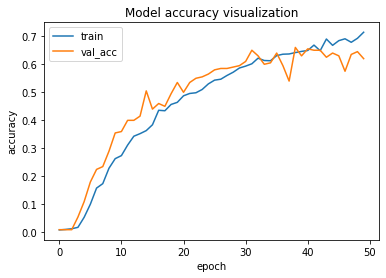

In [ ]:
def reproduce_best_model(condition=False):
  if condition==True:
    ind =13 #best =14
    best_model = load_model('./results/_%d_model-best.hdf5'%(ind+1))
    #best_model.summary()
    test_datagen.reset()
    scores=best_model.evaluate_generator(test_datagen,200,workers=0)
    print("Best_Accuracy = ",scores[1])
    test_datagen.reset()
    scores_ = best_model.predict_generator(test_datagen,workers=0)
    confusion(scores_)
    report(scores_)
    loss_plot()
    acc_plot()
reproduce_best_model(condition=True)